In [1]:
import numpy as np 

import matplotlib.pyplot as plt 
import os 
from keras import layers 
from keras.models import Model
from keras.models import load_model
from keras.callbacks import EarlyStopping,ModelCheckpoint 
import cv2 
import string
from keras.models import Sequential
from keras.layers import Flatten, Dense, Dropout
from keras.optimizers import Adam

Using TensorFlow backend.


In [2]:
def preprocess(character,nchar,n):
    X = np.zeros((n,50,200,1)) 
    y = np.zeros((5,n,nchar)) 

    for i, pic in enumerate(os.listdir("..\\captchas\\images\\")):

        img = cv2.imread(os.path.join("..\\captchas\\images\\", pic), cv2.IMREAD_GRAYSCALE) 
        pic_target = pic[:-4]

        if len(pic_target) < 6: 
            img = img / 255.0 
            img = np.reshape(img, (50, 200, 1))  

            target=np.zeros((5,nchar)) 

            for j, k in enumerate(pic_target):
            
                index = character.find(k) 
                target[j, index] = 1 

            X[i] = img 
            y[:,i] = target 

    return X,y

In [3]:
def createmodel(imgshape, nchar):
    img = layers.Input(shape=imgshape) 
    conv1 = layers.Conv2D(16, (3, 3), padding='same', activation='relu')(img) 
    mp1 = layers.MaxPooling2D(padding='same')(conv1)  
    conv2 = layers.Conv2D(32, (3, 3), padding='same', activation='relu')(mp1)
    mp2 = layers.MaxPooling2D(padding='same')(conv2)  
    conv3 = layers.Conv2D(32, (3, 3), padding='same', activation='relu')(mp2)
    bn = layers.BatchNormalization()(conv3) 
    mp3 = layers.MaxPooling2D(padding='same')(bn)  
    flat = layers.Flatten()(mp3) 
    
    outs = []
    for _ in range(5): 
        dens1 = layers.Dense(64, activation='relu')(flat)
        drop = layers.Dropout(0.5)(dens1) 
        res = layers.Dense(nchar, activation='softmax')(drop)

        outs.append(res) 
    
    
    model = Model(img,outs) 
    learning_rate = 1.25e-4
    adam = Adam(lr=learning_rate)
    model.compile(loss='categorical_crossentropy', optimizer= adam,metrics=["accuracy"])
    return model

In [4]:
imgshape=(50,200,1)
n=len(os.listdir("..\\captchas\\images\\"))
character= string.ascii_lowercase + "0123456789" 
nchar = len(character)

In [5]:
model=createmodel(imgshape,nchar);
model.summary();

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 50, 200, 1)   0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 50, 200, 16)  160         input_1[0][0]                    
__________________________________________________________________________________________________
max_pooling2d_1 (MaxPooling2D)  (None, 25, 100, 16)  0           conv2d_1[0][0]                   
__________________________________________________________________________________________________
conv2d_2 (Conv2D)               (None, 25, 100, 32)  4640        max_pooling2d_1[0][0]            
____________________________________________________________________________________________

In [6]:
X,y=preprocess(character,nchar,n)

X_train, y_train = X[:970], y[:, :970]
X_test, y_test = X[970:], y[:, 970:]

In [8]:
filepath = "..\\captchas\\CAPTCHA_v1.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='loss', verbose=1, save_best_only=True, mode='min')
callback_list = [checkpoint]
hist = model.fit(X_train, [y_train[0], y_train[1], y_train[2], y_train[3],
                 y_train[4]],callbacks = callback_list, batch_size=34, epochs=70, validation_split=0.2)

Train on 776 samples, validate on 194 samples
Epoch 1/70
776/776 [==============================] - 3s 4ms/step - loss: 14.7679 - dense_2_loss: 2.6585 - dense_4_loss: 2.9296 - dense_6_loss: 3.0733 - dense_8_loss: 3.1563 - dense_10_loss: 2.9470 - dense_2_accuracy: 0.2436 - dense_4_accuracy: 0.1727 - dense_6_accuracy: 0.1392 - dense_8_accuracy: 0.0979 - dense_10_accuracy: 0.1740 - val_loss: 17.5695 - val_dense_2_loss: 3.6289 - val_dense_4_loss: 3.4618 - val_dense_6_loss: 3.5082 - val_dense_8_loss: 3.4967 - val_dense_10_loss: 3.4742 - val_dense_2_accuracy: 0.0000e+00 - val_dense_4_accuracy: 0.2216 - val_dense_6_accuracy: 0.0928 - val_dense_8_accuracy: 0.1546 - val_dense_10_accuracy: 0.1598

Epoch 00001: loss improved from inf to 14.76789, saving model to ..\captchas\CAPTCHA_v1.hdf5
Epoch 2/70
776/776 [==============================] - 3s 4ms/step - loss: 13.9394 - dense_2_loss: 2.4241 - dense_4_loss: 2.7614 - dense_6_loss: 2.9263 - dense_8_loss: 3.0453 - dense_10_loss: 2.7742 - dense_2_ac

776/776 [==============================] - 3s 4ms/step - loss: 5.6035 - dense_2_loss: 0.5658 - dense_4_loss: 1.0933 - dense_6_loss: 1.3772 - dense_8_loss: 1.3784 - dense_10_loss: 1.1859 - dense_2_accuracy: 0.8621 - dense_4_accuracy: 0.6817 - dense_6_accuracy: 0.5902 - dense_8_accuracy: 0.5863 - dense_10_accuracy: 0.6327 - val_loss: 13.8996 - val_dense_2_loss: 3.6782 - val_dense_4_loss: 2.4373 - val_dense_6_loss: 2.6400 - val_dense_8_loss: 2.6593 - val_dense_10_loss: 2.5407 - val_dense_2_accuracy: 0.0052 - val_dense_4_accuracy: 0.7113 - val_dense_6_accuracy: 0.5567 - val_dense_8_accuracy: 0.5619 - val_dense_10_accuracy: 0.5979

Epoch 00012: loss improved from 6.08198 to 5.60349, saving model to ..\captchas\CAPTCHA_v1.hdf5
Epoch 13/70
776/776 [==============================] - 3s 4ms/step - loss: 5.1341 - dense_2_loss: 0.5112 - dense_4_loss: 0.9692 - dense_6_loss: 1.2250 - dense_8_loss: 1.3612 - dense_10_loss: 1.0655 - dense_2_accuracy: 0.8492 - dense_4_accuracy: 0.7152 - dense_6_accurac

776/776 [==============================] - 3s 4ms/step - loss: 2.4067 - dense_2_loss: 0.2106 - dense_4_loss: 0.4699 - dense_6_loss: 0.6523 - dense_8_loss: 0.6258 - dense_10_loss: 0.4441 - dense_2_accuracy: 0.9356 - dense_4_accuracy: 0.8544 - dense_6_accuracy: 0.8054 - dense_8_accuracy: 0.8260 - dense_10_accuracy: 0.8814 - val_loss: 9.1766 - val_dense_2_loss: 4.8973 - val_dense_4_loss: 0.8688 - val_dense_6_loss: 1.2410 - val_dense_8_loss: 1.2957 - val_dense_10_loss: 1.0880 - val_dense_2_accuracy: 0.0464 - val_dense_4_accuracy: 0.8351 - val_dense_6_accuracy: 0.7320 - val_dense_8_accuracy: 0.7010 - val_dense_10_accuracy: 0.7113

Epoch 00023: loss improved from 2.55777 to 2.40670, saving model to ..\captchas\CAPTCHA_v1.hdf5
Epoch 24/70
776/776 [==============================] - 3s 4ms/step - loss: 2.1773 - dense_2_loss: 0.2043 - dense_4_loss: 0.3957 - dense_6_loss: 0.5599 - dense_8_loss: 0.6101 - dense_10_loss: 0.4111 - dense_2_accuracy: 0.9510 - dense_4_accuracy: 0.9034 - dense_6_accuracy

776/776 [==============================] - 3s 4ms/step - loss: 1.2386 - dense_2_loss: 0.1217 - dense_4_loss: 0.2392 - dense_6_loss: 0.3218 - dense_8_loss: 0.3285 - dense_10_loss: 0.2255 - dense_2_accuracy: 0.9652 - dense_4_accuracy: 0.9356 - dense_6_accuracy: 0.9162 - dense_8_accuracy: 0.9188 - dense_10_accuracy: 0.9510 - val_loss: 10.0735 - val_dense_2_loss: 6.8905 - val_dense_4_loss: 0.6444 - val_dense_6_loss: 0.9757 - val_dense_8_loss: 0.9190 - val_dense_10_loss: 0.9302 - val_dense_2_accuracy: 0.0412 - val_dense_4_accuracy: 0.8608 - val_dense_6_accuracy: 0.7216 - val_dense_8_accuracy: 0.7629 - val_dense_10_accuracy: 0.7732

Epoch 00034: loss improved from 1.34146 to 1.23855, saving model to ..\captchas\CAPTCHA_v1.hdf5
Epoch 35/70
776/776 [==============================] - 3s 4ms/step - loss: 1.2449 - dense_2_loss: 0.1313 - dense_4_loss: 0.1958 - dense_6_loss: 0.3174 - dense_8_loss: 0.3579 - dense_10_loss: 0.2419 - dense_2_accuracy: 0.9665 - dense_4_accuracy: 0.9420 - dense_6_accurac

776/776 [==============================] - 3s 4ms/step - loss: 0.8798 - dense_2_loss: 0.0833 - dense_4_loss: 0.1349 - dense_6_loss: 0.2384 - dense_8_loss: 0.2571 - dense_10_loss: 0.1666 - dense_2_accuracy: 0.9755 - dense_4_accuracy: 0.9704 - dense_6_accuracy: 0.9317 - dense_8_accuracy: 0.9291 - dense_10_accuracy: 0.9601 - val_loss: 9.8288 - val_dense_2_loss: 6.9030 - val_dense_4_loss: 0.6033 - val_dense_6_loss: 0.9106 - val_dense_8_loss: 0.8767 - val_dense_10_loss: 0.8286 - val_dense_2_accuracy: 0.0876 - val_dense_4_accuracy: 0.8711 - val_dense_6_accuracy: 0.7680 - val_dense_8_accuracy: 0.7577 - val_dense_10_accuracy: 0.7990

Epoch 00045: loss improved from 0.91273 to 0.87976, saving model to ..\captchas\CAPTCHA_v1.hdf5
Epoch 46/70
776/776 [==============================] - 3s 4ms/step - loss: 0.8398 - dense_2_loss: 0.1008 - dense_4_loss: 0.1483 - dense_6_loss: 0.2227 - dense_8_loss: 0.2065 - dense_10_loss: 0.1629 - dense_2_accuracy: 0.9729 - dense_4_accuracy: 0.9601 - dense_6_accuracy

776/776 [==============================] - 3s 4ms/step - loss: 0.5853 - dense_2_loss: 0.0574 - dense_4_loss: 0.1089 - dense_6_loss: 0.1391 - dense_8_loss: 0.1606 - dense_10_loss: 0.1185 - dense_2_accuracy: 0.9832 - dense_4_accuracy: 0.9742 - dense_6_accuracy: 0.9665 - dense_8_accuracy: 0.9665 - dense_10_accuracy: 0.9716 - val_loss: 10.1838 - val_dense_2_loss: 7.3082 - val_dense_4_loss: 0.6061 - val_dense_6_loss: 0.8691 - val_dense_8_loss: 0.8597 - val_dense_10_loss: 0.8353 - val_dense_2_accuracy: 0.0825 - val_dense_4_accuracy: 0.8608 - val_dense_6_accuracy: 0.7835 - val_dense_8_accuracy: 0.7784 - val_dense_10_accuracy: 0.7938

Epoch 00056: loss improved from 0.66345 to 0.58531, saving model to ..\captchas\CAPTCHA_v1.hdf5
Epoch 57/70
776/776 [==============================] - 3s 4ms/step - loss: 0.6274 - dense_2_loss: 0.0640 - dense_4_loss: 0.1175 - dense_6_loss: 0.1442 - dense_8_loss: 0.1855 - dense_10_loss: 0.1149 - dense_2_accuracy: 0.9845 - dense_4_accuracy: 0.9665 - dense_6_accurac

776/776 [==============================] - 3s 4ms/step - loss: 0.4887 - dense_2_loss: 0.0451 - dense_4_loss: 0.0857 - dense_6_loss: 0.1282 - dense_8_loss: 0.1452 - dense_10_loss: 0.0839 - dense_2_accuracy: 0.9923 - dense_4_accuracy: 0.9729 - dense_6_accuracy: 0.9652 - dense_8_accuracy: 0.9562 - dense_10_accuracy: 0.9832 - val_loss: 10.1310 - val_dense_2_loss: 7.4442 - val_dense_4_loss: 0.5782 - val_dense_6_loss: 0.8730 - val_dense_8_loss: 0.8178 - val_dense_10_loss: 0.8208 - val_dense_2_accuracy: 0.1649 - val_dense_4_accuracy: 0.8763 - val_dense_6_accuracy: 0.7887 - val_dense_8_accuracy: 0.7938 - val_dense_10_accuracy: 0.7990

Epoch 00067: loss did not improve from 0.48489
Epoch 68/70
776/776 [==============================] - 3s 4ms/step - loss: 0.4574 - dense_2_loss: 0.0441 - dense_4_loss: 0.0958 - dense_6_loss: 0.0881 - dense_8_loss: 0.1430 - dense_10_loss: 0.0859 - dense_2_accuracy: 0.9923 - dense_4_accuracy: 0.9729 - dense_6_accuracy: 0.9781 - dense_8_accuracy: 0.9523 - dense_10_a

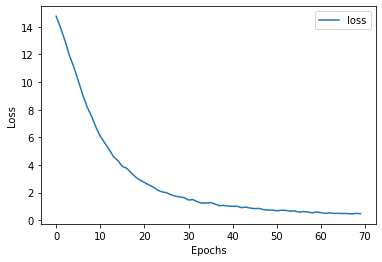

Final Training Loss: 0.45739863743794335


In [9]:
for label in ["loss"]:
    plt.plot(hist.history[label],label=label)
    plt.legend()
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.show()
loss = hist.history['loss']
print("Final Training Loss: " + str(np.min(loss)))

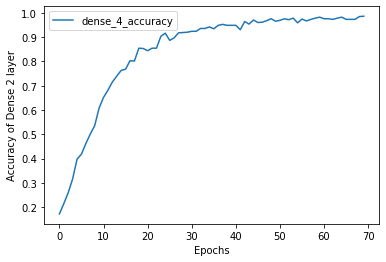

Final Training Accuracy: 0.98582476


In [11]:
for label in ["dense_4_accuracy"]:
    plt.plot(hist.history[label],label=label)
    plt.legend()
    plt.xlabel("Epochs")
    plt.ylabel("Accuracy of Dense 2 layer")
    plt.show()

acc = hist.history['dense_4_accuracy']
print("Final Training Accuracy: " + str(np.max(acc)))

In [12]:
model = load_model("..\\captchas\\CAPTCHA_v1.hdf5")
preds = model.evaluate(X_test, [y_test[0], y_test[1], y_test[2], y_test[3], y_test[4]])

100/100 [==============================] - 0s 2ms/step


In [15]:
print ("Accuracy on testing set= " + str(preds[4]))

Accuracy on testing set= 0.8629055023193359
